### Lab-6 : Self-Practice

In this week self practice, you will apply [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) on multi-class problem. In the following 3-class generated blobs you will train SVCs in a one-vs-one and one-vs-rest approach. Draw the decision bounderies of each approach.

#### Question: Recall what the difference between one-vs-one and on-vs-rest for multiclass classification is. 

In [1]:
from sklearn.datasets import make_blobs 
import matplotlib.pyplot as plt


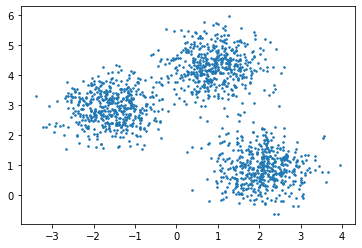

In [2]:
# we create the dataset
X, y = make_blobs(n_samples=1500, centers=3, n_features=2, cluster_std=0.60,
                  random_state=0)

plt.scatter(X[:, 0], X[:, 1],  marker=".", s=10)

### Create a svc model to classify the data point using one-vs-one approach and draw the desicion bounderies (hyperplan and margins)

In [19]:
import numpy as np

def plot_svc_decision_function(model, ax=None):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T

    for e in model.estimators_:
        Z = e.decision_function(xy).reshape(X.shape)
        # plot decision boundary and margins
        ax.contour(X, Y, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                   linestyles=['--', '-', '--'])

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)


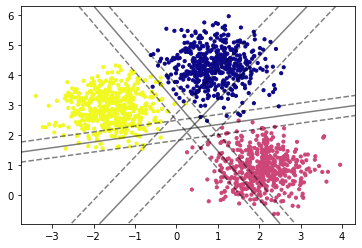

In [24]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier

SVC_ovo = OneVsOneClassifier(SVC(kernel='linear'))
SVC_ovo.fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=10, cmap='plasma')
plot_svc_decision_function(SVC_ovo)

### Create a svc model to classify the data points using one-vs-rest approach and draw the desicion bounderies

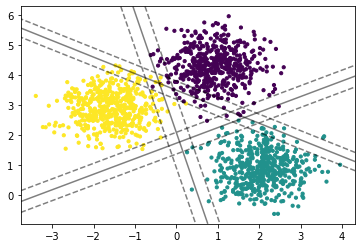

In [25]:
from sklearn.multiclass import OneVsRestClassifier

SVC_ovr = OneVsRestClassifier(SVC(kernel='linear'))
SVC_ovr.fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=10, cmap='viridis')
plot_svc_decision_function(SVC_ovr)

### Using 5-fold cross validation compare the accuracies of each method

In [26]:
from sklearn.model_selection import cross_val_score


score = cross_val_score(SVC_ovo, X, y, cv=5, scoring="accuracy")
print(f'ovo_accuracy={np.mean(score)}')

score = cross_val_score(SVC_ovr, X, y, cv=5, scoring="accuracy")
print(f'ovr_accuracy={np.mean(score)}')

ovo_accuracy=0.9973333333333333
ovr_accuracy=0.9960000000000001
